In [1]:
from fastai.vision import *

In [2]:
tfms = get_transforms(do_flip=True)

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_csv('.',ds_tfms=tfms, size = 400)

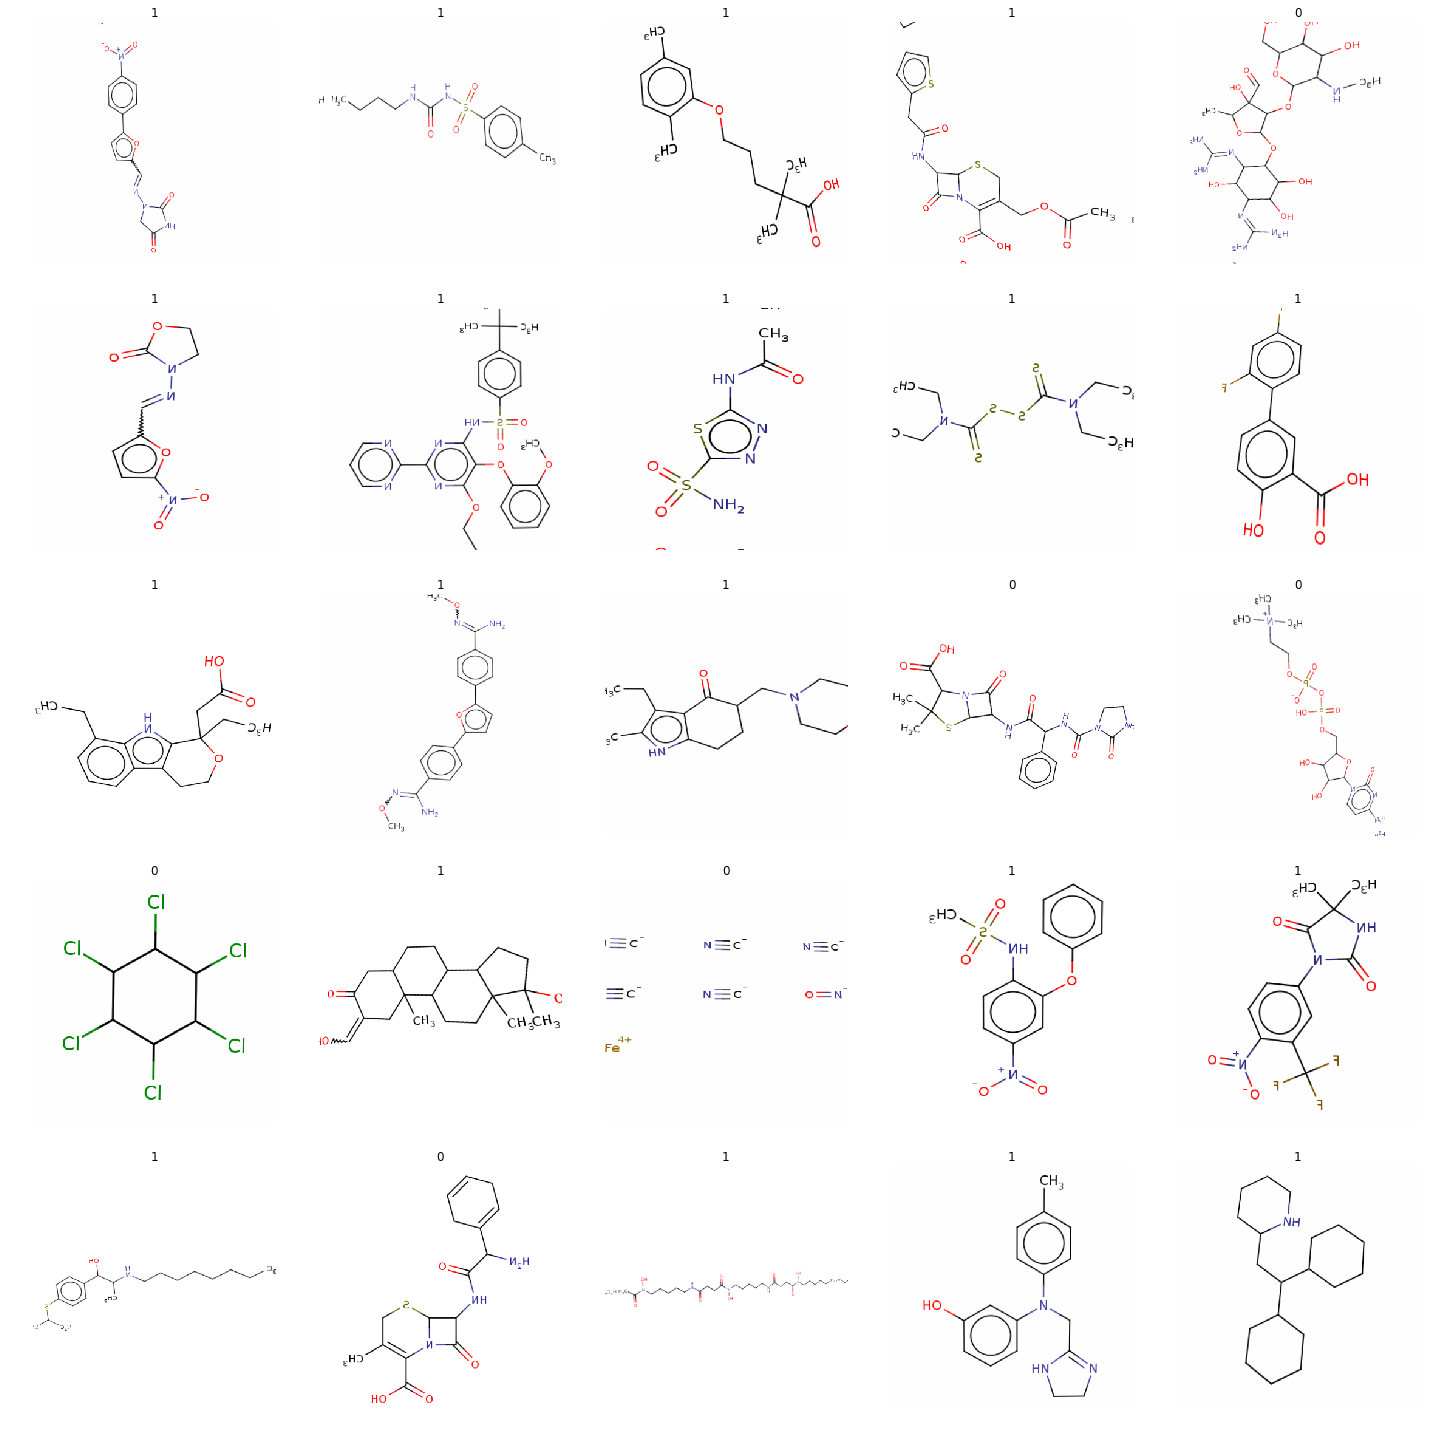

In [5]:
data.show_batch(row=3)

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jupyter/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 26024117.39it/s]


In [8]:
learn.fit(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.824826,0.849475,0.507463,00:06
1,0.762996,0.878358,0.462687,00:06
2,0.718694,0.854687,0.574627,00:06
3,0.699835,0.819705,0.574627,00:06
4,0.684705,0.849271,0.529851,00:06
5,0.670776,0.798077,0.529851,00:06
6,0.657147,0.776202,0.567164,00:06
7,0.640454,0.788153,0.559702,00:06
8,0.629552,0.740214,0.604478,00:06
9,0.621340,0.772707,0.567164,00:07


OK. This performance is not good. Let us try another model. Restnet34 this time.

In [11]:
learn_restnet34 = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn_restnet34.fit(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.048047,0.860883,0.514925,00:10
1,0.919524,0.855505,0.507463,00:10
2,0.847122,0.904852,0.507463,00:10
3,0.785729,0.854225,0.492537,00:10
4,0.759269,0.773815,0.485075,00:10
5,0.730208,0.765035,0.470149,00:09
6,0.705449,0.750550,0.470149,00:09
7,0.676335,0.769056,0.447761,00:09
8,0.657293,0.763525,0.425373,00:09
9,0.638428,0.819665,0.417910,00:09


Slightly better than Resnet 18. let us see if we are looking at the right learning rate by using the Learning rate finder

In [13]:
lr_find(learn_restnet34)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


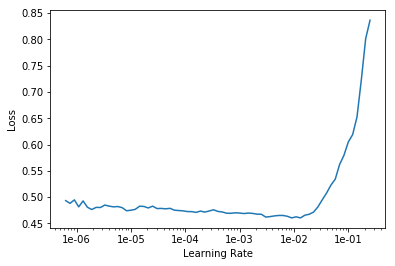

In [14]:
learn_restnet34.recorder.plot()

While patially from this plot, we know that Resnet 34 is probably not a good model for our dataset, we still note that 1e-2 might be the best learning rate to choose 

In [16]:
lr = 1e-2

In [17]:
learn_restnet34.fit_one_cycle(20,slice(lr),pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.478730,0.847655,0.432836,00:09
1,0.476203,0.839922,0.417910,00:09
2,0.468549,0.841371,0.425373,00:09
3,0.463697,0.854839,0.425373,00:10
4,0.466192,0.880278,0.440298,00:10
5,0.462364,0.894220,0.470149,00:10
6,0.462112,0.872770,0.440298,00:10
7,0.461967,0.952159,0.455224,00:09
8,0.465591,0.888364,0.425373,00:09
9,0.466389,1.006536,0.432836,00:09


## Let us try Resnet 50 

We are having memory issues, so set a smaller batch size from the start. I found a intersting twitter about practical tips from simple tricks to multi-GPU code and distributed setups. https://twitter.com/Thom_Wolf/status/1051771906255454208

In [1]:
from fastai.vision import *

In [2]:
tfms = get_transforms(do_flip=True)

In [6]:
np.random.seed(42)
bs = 32
data = ImageDataBunch.from_csv('.',ds_tfms=tfms, size = 400, bs=bs)

Note: Resnet50 takes more GPU memory than Resnet 18 or Resnet34, so starting from bs = 256, I tried 256, 128, 64, 32, the last of which works. 

In [10]:
learn_resnet50 = cnn_learner(data, models.resnet50, metrics=error_rate)

In [11]:
lr_find(learn_resnet50)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


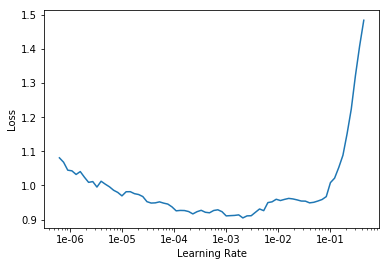

In [12]:
learn_resnet50.recorder.plot()

In [13]:
lr= 2e-3
learn_resnet50.fit_one_cycle(20,slice(lr),pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,1.017711,0.756915,0.514925,00:17
1,0.949472,0.953690,0.507463,00:16
2,0.881752,0.948749,0.462687,00:16
3,0.866943,0.843023,0.447761,00:15
4,0.832591,0.919368,0.425373,00:15
5,0.814310,1.180749,0.470149,00:15
6,0.786128,0.886412,0.417910,00:15
7,0.778760,1.141693,0.447761,00:15
8,0.765341,0.819601,0.447761,00:15
9,0.748275,0.814894,0.447761,00:15


## Let us try Seueeze Net  

From now on, let us reset our cuda memory each time. Note that si

In [ ]:
%reset

from faastai.vision import *
tfms = get_transforms(do_flip=True)
np.random.seed(42)
bs = 32
data = ImageDataBunch.from_csv('.',ds_tfms=tfms, size = 400, bs=bs)
learn_squeezenet1_0 = cnn_learner(data, models.squeezenet1_0, metrics=error_rate)

In [ ]:
lr_find(learn_squeezenet1_0)
learn_squeezenet1_0.recorder.plot()

In [ ]:
lr= 2e-3
learn_resnet50.fit_one_cycle(20,slice(lr),pct_start=0.8)

We can try squeezenet1-1

In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  n


Nothing done.


In [ ]:
from faastai.vision import *
tfms = get_transforms(do_flip=True)
np.random.seed(42)
bs = 32
data = ImageDataBunch.from_csv('.',ds_tfms=tfms, size = 400, bs=bs)
learn_squeezenet1_1 = cnn_learner(data, models.squeezenet1_1, metrics=error_rate)

In [ ]:
lr_find(learn_squeezenet1_0)
learn_squeezenet1_0.recorder.plot()

In [ ]:
lr= 2e-3 
learn_resnet50.fit_one_cycle(20,slice(lr),pct_start=0.8)